In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import string, os, random, cv2
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Embedding, LSTM

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
########### TASK 1 ############

In [3]:
#Вирішіть завдання класифікації даних за допомогою повнозв’язаної нейромережі прямого поширення

In [4]:
file = "diabetes.csv"
dataset = pd.read_csv(file)

scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
dataset = pd.DataFrame(d, columns=names)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [5]:
dataset.shape

(768, 9)

In [6]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
y_train = keras.utils.to_categorical(y_train, 2) #вектор у матрицю класів
y_test = keras.utils.to_categorical(y_test, 2)

In [7]:
model = keras.Sequential([keras.layers.Dense(20,input_shape=(8,),activation = 'relu'),
                            keras.layers.Dense(32,activation = 'relu'),
                            keras.layers.Dense(2,activation = 'softmax')])

model.compile(loss = "binary_crossentropy", metrics = ['accuracy'], optimizer = 'Adam')
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 50)

Epoch 1/50
20/20 [==============================] - 2s 22ms/step - loss: 0.6801 - accuracy: 0.6417 - val_loss: 0.6587 - val_accuracy: 0.6883
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.6417 - val_loss: 0.6434 - val_accuracy: 0.6883
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.6417 - val_loss: 0.6356 - val_accuracy: 0.6883
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.6417 - val_loss: 0.6279 - val_accuracy: 0.6883
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6417 - val_loss: 0.6243 - val_accuracy: 0.6883
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6417 - val_loss: 0.6176 - val_accuracy: 0.6883
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.6417 - val_loss: 0.6092 - val_accuracy: 0.6883
Epoch 8/50
20/20 [=

In [8]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

Losses: 0.4314076900482178
Accuracy: 0.798701286315918


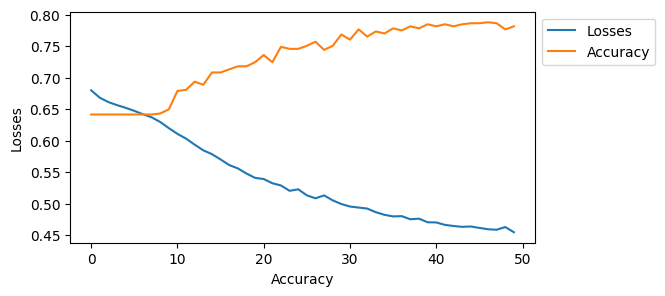

In [9]:
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

In [10]:
########### TASK 2 ############

In [11]:
# Вирішіть завдання класифікації зображень за допомогою згорткової нейромережі
# https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification

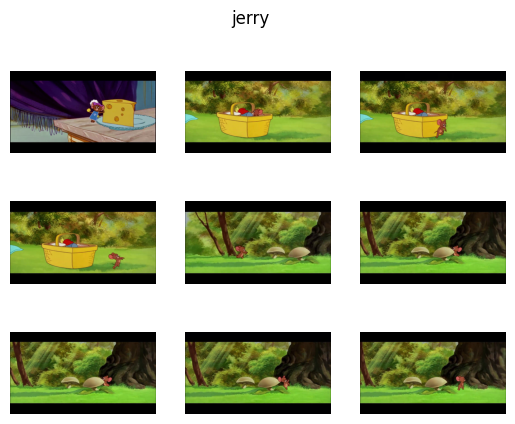

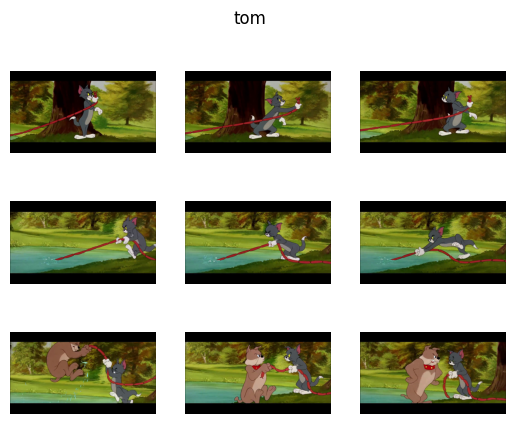

In [12]:
path = 'tom_and_jerry/tom_and_jerry/'
categories = ['jerry', 'tom']
for category in categories:
    fig, _ = plt.subplots(3,3)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:9]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 3, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [13]:
X = []
y = []
paths = []

for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        paths.append([path+category+'/'+f, k])

for path in paths:
    image = cv2.imread(path[0])
    image = cv2.resize(image, (55, 32))
    X.append(image)
    
    label = path[1]
    y.append(label)
    
X = np.array(X, dtype="float") / 255
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(32, 55, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
80/80 [==============================] - 3s 27ms/step - loss: 0.5942 - accuracy: 0.6822
Epoch 2/15
80/80 [==============================] - 2s 27ms/step - loss: 0.3795 - accuracy: 0.8419
Epoch 3/15
80/80 [==============================] - 2s 27ms/step - loss: 0.2791 - accuracy: 0.8904
Epoch 4/15
80/80 [==============================] - 2s 28ms/step - loss: 0.2226 - accuracy: 0.9148
Epoch 5/15
80/80 [==============================] - 2s 29ms/step - loss: 0.1651 - accuracy: 0.9401
Epoch 6/15
80/80 [==============================] - 2s 27ms/step - loss: 0.1277 - accuracy: 0.9550
Epoch 7/15
80/80 [==============================] - 2s 28ms/step - loss: 0.1007 - accuracy: 0.9692
Epoch 8/15
80/80 [==============================] - 2s 28ms/step - loss: 0.0809 - accuracy: 0.9767
Epoch 9/15
80/80 [==============================] - 2s 27ms/step - loss: 0.0670 - accuracy: 0.9811
Epoch 10/15
80/80 [==============================] - 2s 27ms/step - loss: 0.0595 - accuracy: 0.9823
Epoch 11/

In [15]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

Losses: 0.27160099148750305
Accuracy: 0.9447949528694153


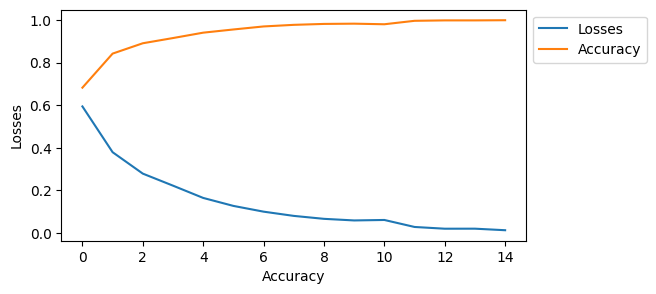

In [16]:
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

In [17]:
########### TASK 3 ############

In [18]:
# Вирішіть задачу класифікації текстів за допомогою рекурентної нейромережі.
# #https://www.kaggle.com/code/dejavu23/sms-spam-or-ham-beginner/data

In [19]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset = dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
dataset = dataset.rename(columns={"v1":"label", "v2":"text"})
label = {"ham": 0, "spam": 1}
dataset.label = dataset.label.apply(lambda l:label[l])

In [20]:
def cleaning(value):
    punctuation_cleaning = []
    stopwords_cleaning_string = ''
    
    for i in value:
        if i not in string.punctuation:
            punctuation_cleaning.append(i)
    punctuation_cleaning = "".join(punctuation_cleaning).split()
    
    for j in punctuation_cleaning:
        if j.lower() not in stopwords.words("english"):
            stopwords_cleaning_string += j.lower() + ' '
    
    return stopwords_cleaning_string

dataset['text'] = dataset['text'].apply(cleaning)
dataset.head()

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [21]:
X = dataset['text']
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [22]:
token = Tokenizer(lower=False)
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

array = []
for i in X_train:
    array.append(len(i))
maxlen = int(np.ceil(np.mean(array))) # вирівнюємо довжину

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
total_words = len(token.word_index) + 1

In [27]:
model = keras.Sequential()
model.add(Embedding(total_words, 32, input_length= maxlen))
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
140/140 [==============================] - 5s 9ms/step - loss: 0.3567 - accuracy: 0.8809
Epoch 2/10
140/140 [==============================] - 1s 9ms/step - loss: 0.1069 - accuracy: 0.9812
Epoch 3/10
140/140 [==============================] - 1s 9ms/step - loss: 0.0545 - accuracy: 0.9933
Epoch 4/10
140/140 [==============================] - 1s 9ms/step - loss: 0.0293 - accuracy: 0.9971
Epoch 5/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0176 - accuracy: 0.9982
Epoch 6/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0112 - accuracy: 0.9991
Epoch 7/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0071 - accuracy: 0.9996
Epoch 8/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0051 - accuracy: 0.9998
Epoch 9/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 0.9998
Epoch 10/10
140/140 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 0.9998

In [28]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

Losses: 0.09931774437427521
Accuracy: 0.9802690744400024


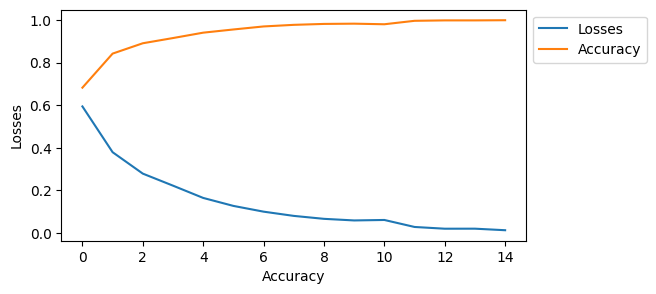

In [29]:
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()